Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 151s 881ms/step - accuracy: 0.6966 - loss: 0.8108 - val_accuracy: 0.5000 - val_loss: 0.6682
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 665ms/step - accuracy: 0.7830 - loss: 0.3679 - val_accuracy: 0.6250 - val_loss: 0.8977
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 669ms/step - accuracy: 0.8644 - loss: 0.3351 - val_accuracy: 0.6875 - val_loss: 0.8273
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 663ms/step - accuracy: 0.8756 - loss: 0.3036 - val_accuracy: 0.6250 - val_loss: 1.4524
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 664ms/step - accuracy: 0.8864 - loss: 0.2764 - val_accuracy: 0.6875 - val_loss: 0.9577
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 666ms/step - accuracy: 0.9003 - loss: 0.2573 - val_accuracy: 0.9375 - val_loss: 0.4421
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 667ms/step - accuracy: 0.9038 - loss: 0.2454 - val_accuracy: 0.7500 - val_loss: 0.4798
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 668ms/step - accuracy: 0.9110 - loss: 0.23

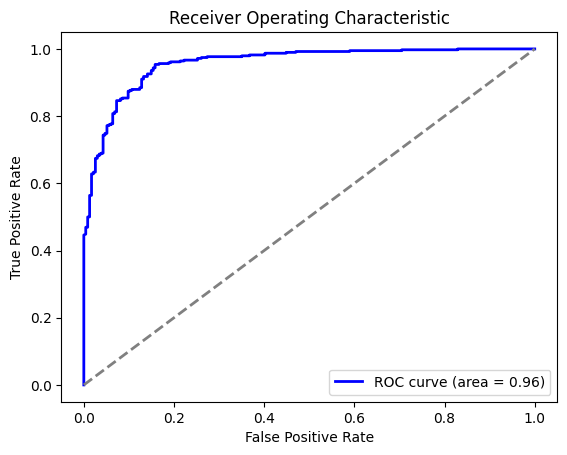

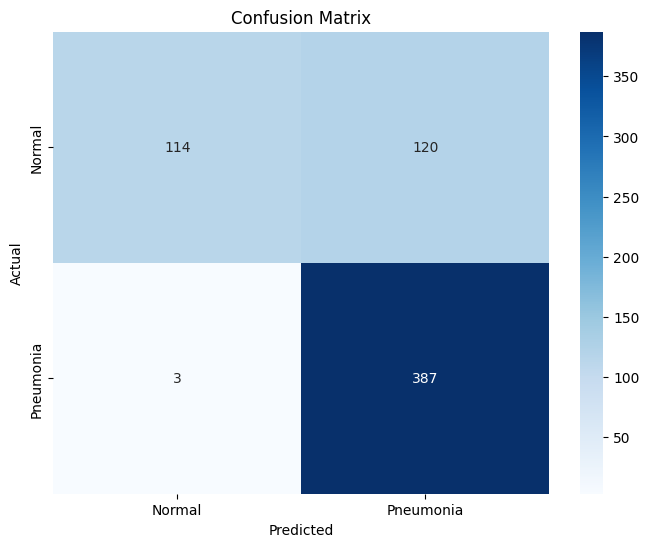

              precision    recall  f1-score   support

      Normal       0.97      0.49      0.65       234
   Pneumonia       0.76      0.99      0.86       390

    accuracy                           0.80       624
   macro avg       0.87      0.74      0.76       624
weighted avg       0.84      0.80      0.78       624



In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

# Define dataset path
dataset_path = '/kaggle/input/x-ray-datasets/chest_Xray'  # Adjust if your dataset path is different
# Create a results directory if it doesn't exist
os.makedirs("results", exist_ok=True)
# Define image parameters
IMG_SIZE = (128, 128)  # Adjust based on your dataset's image resolution
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = val_test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Define a lightweight CNN model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

# Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
# history = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=50,  # Adjust based on your needs
#     callbacks=[early_stopping]
# )
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20  # Start small, increase if needed
)
# Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(test_generator)
# print(f'Test Accuracy: {test_acc:.2f}')
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Generate predictions and compute ROC-AUC
y_pred = model.predict(test_generator)
y_true = test_generator.classes

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Compute and plot confusion matrix
# custom_threshold = 0.9  # TODO
# y_pred_classes = (y_pred > custom_threshold).astype(int)
y_pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia']))

# Save the model
model.save('/kaggle/working/pneumonia_cnn_model.h5')


In [3]:
# load the model
from tensorflow.keras.models import load_model
model = load_model('/kaggle/working/pneumonia_cnn_model.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/working/pneumonia_cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


🧪 Test de plusieurs seuils :

➡️ Seuil = 0.1
              precision    recall  f1-score   support

      Normal       1.00      0.12      0.21       234
   Pneumonia       0.65      1.00      0.79       390

    accuracy                           0.67       624
   macro avg       0.83      0.56      0.50       624
weighted avg       0.78      0.67      0.57       624



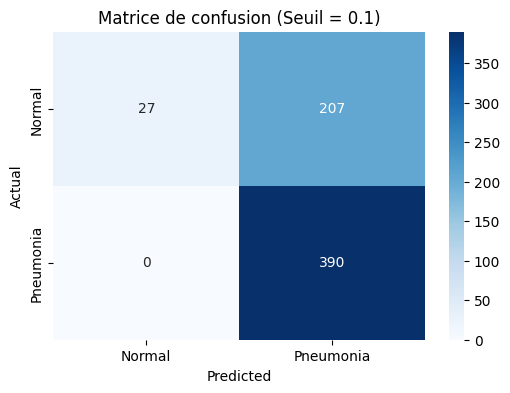

➡️ Seuil = 0.2
              precision    recall  f1-score   support

      Normal       1.00      0.17      0.29       234
   Pneumonia       0.67      1.00      0.80       390

    accuracy                           0.69       624
   macro avg       0.83      0.59      0.55       624
weighted avg       0.79      0.69      0.61       624



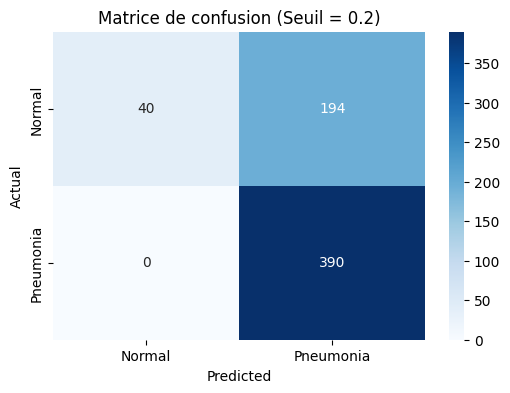

➡️ Seuil = 0.3
              precision    recall  f1-score   support

      Normal       0.99      0.29      0.44       234
   Pneumonia       0.70      1.00      0.82       390

    accuracy                           0.73       624
   macro avg       0.84      0.64      0.63       624
weighted avg       0.81      0.73      0.68       624



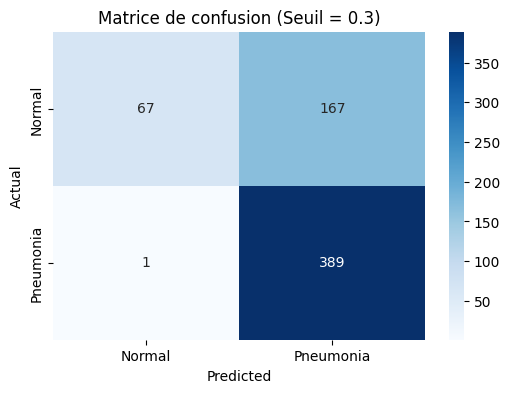

➡️ Seuil = 0.4
              precision    recall  f1-score   support

      Normal       0.98      0.38      0.54       234
   Pneumonia       0.73      0.99      0.84       390

    accuracy                           0.76       624
   macro avg       0.85      0.69      0.69       624
weighted avg       0.82      0.76      0.73       624



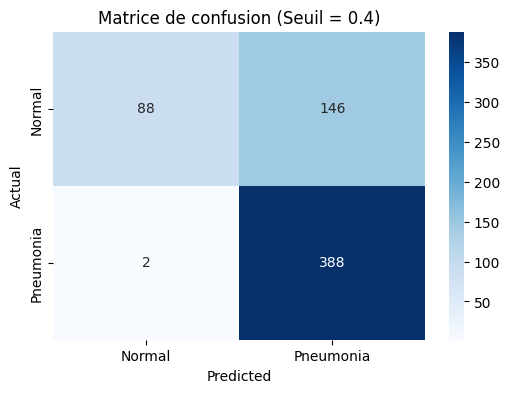

➡️ Seuil = 0.5
              precision    recall  f1-score   support

      Normal       0.97      0.49      0.65       234
   Pneumonia       0.76      0.99      0.86       390

    accuracy                           0.80       624
   macro avg       0.87      0.74      0.76       624
weighted avg       0.84      0.80      0.78       624



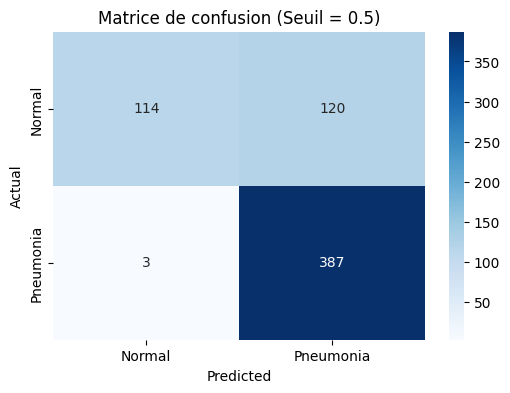

➡️ Seuil = 0.6
              precision    recall  f1-score   support

      Normal       0.96      0.55      0.70       234
   Pneumonia       0.79      0.99      0.88       390

    accuracy                           0.82       624
   macro avg       0.87      0.77      0.79       624
weighted avg       0.85      0.82      0.81       624



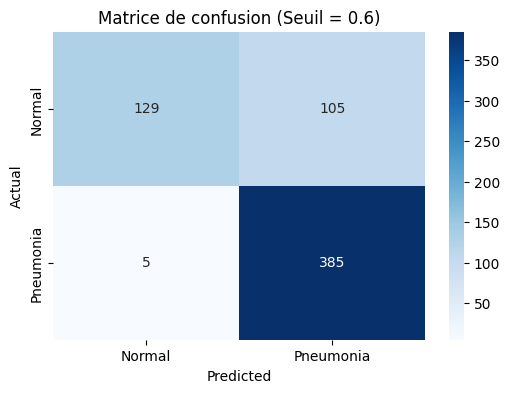

➡️ Seuil = 0.7
              precision    recall  f1-score   support

      Normal       0.95      0.64      0.77       234
   Pneumonia       0.82      0.98      0.89       390

    accuracy                           0.85       624
   macro avg       0.88      0.81      0.83       624
weighted avg       0.87      0.85      0.84       624



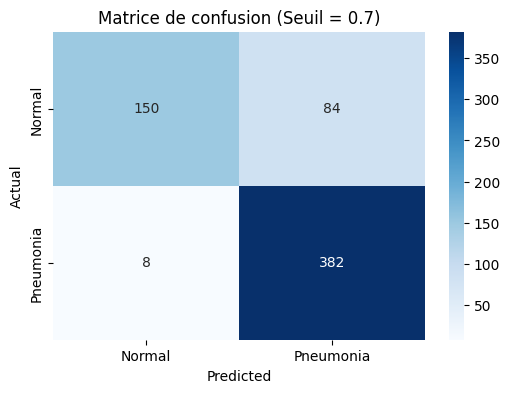

➡️ Seuil = 0.8
              precision    recall  f1-score   support

      Normal       0.95      0.71      0.81       234
   Pneumonia       0.85      0.98      0.91       390

    accuracy                           0.88       624
   macro avg       0.90      0.85      0.86       624
weighted avg       0.89      0.88      0.87       624



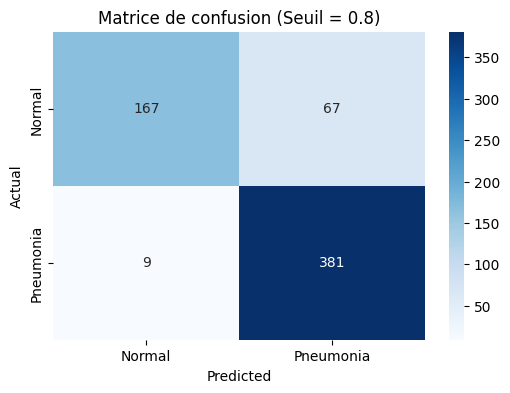

➡️ Seuil = 0.9
              precision    recall  f1-score   support

      Normal       0.93      0.81      0.86       234
   Pneumonia       0.89      0.96      0.93       390

    accuracy                           0.90       624
   macro avg       0.91      0.88      0.89       624
weighted avg       0.91      0.90      0.90       624



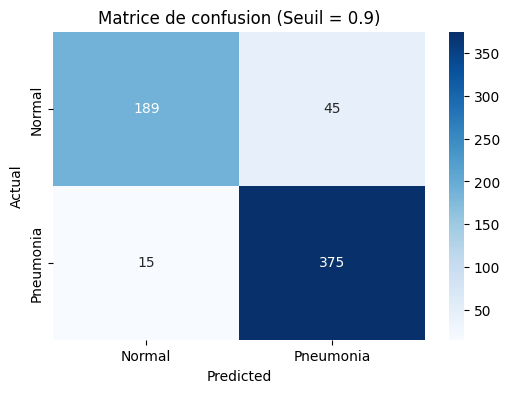

In [7]:
# Ajoute le code de seuils en cellule
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9]
precisions = []
recalls = []
f1_scores = []

print("\n🧪 Test de plusieurs seuils :\n")
for thresh in thresholds:
    y_pred_thresh = (y_pred > thresh).astype(int)
    
    precision = precision_score(y_true, y_pred_thresh)
    recall = recall_score(y_true, y_pred_thresh)
    f1 = f1_score(y_true, y_pred_thresh)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"➡️ Seuil = {thresh}")
    print(classification_report(y_true, y_pred_thresh, target_names=['Normal', 'Pneumonia']))
    
    # Matrice de confusion pour chaque seuil
    cm = confusion_matrix(y_true, y_pred_thresh)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
    plt.title(f'Matrice de confusion (Seuil = {thresh})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


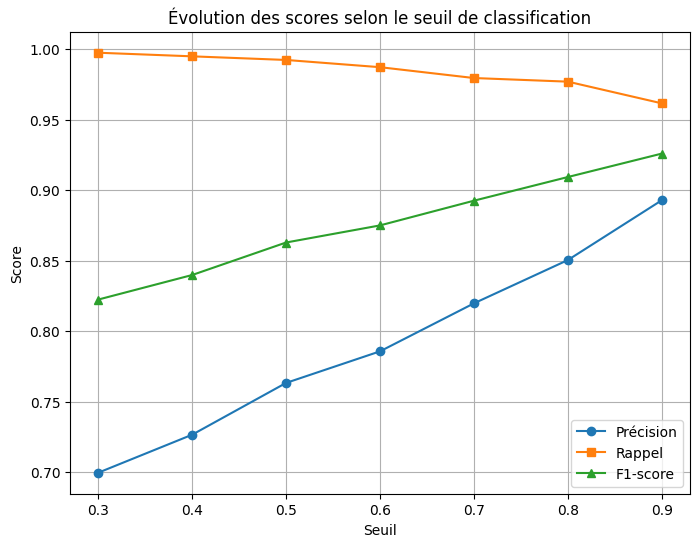

In [5]:
# Ajoute la courbe précision/rappel
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, marker='o', label='Précision')
plt.plot(thresholds, recalls, marker='s', label='Rappel')
plt.plot(thresholds, f1_scores, marker='^', label='F1-score')
plt.title('Évolution des scores selon le seuil de classification')
plt.xlabel('Seuil')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()
